In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score


In [48]:
# Reads data from csv file
label_encoder = LabelEncoder()
data = pd.read_csv('data/market_analysis_2019.csv', delimiter=';')

data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data['revenue'] = data['revenue'].str.replace(',', '.').astype(float)

# Assuming 'guests' column might also contain '15+' or similar strings
data['guests'] = data['guests'].replace('15+', 15).astype(float)

# Encode 'city' column
data['city_encoded'] = label_encoder.fit_transform(data['city'])

# Calculate MonthSin and MonthCos
data['MonthSin'] = np.sin(2 * np.pi * data['month'].dt.month / 12)
data['MonthCos'] = np.cos(2 * np.pi * data['month'].dt.month / 12)

# Select features and target before removing NaN values
cleaned_data = data[['bedrooms', 'bathrooms', 'guests', 'city_encoded', 'MonthSin', 'MonthCos']]
actual_rev = data['revenue'].copy()

# Remove rows with NaN values from both features and target
combined = cleaned_data.copy()
combined['revenue'] = actual_rev
combined_clean = combined.dropna()

# Separate features and target again after cleaning
cleaned_data = combined_clean[['bedrooms', 'bathrooms', 'guests', 'city_encoded', 'MonthSin', 'MonthCos']]
actual_rev = combined_clean['revenue']
combined_clean = combined_clean[combined_clean['revenue'] != 0]
split_index = int(len(combined_clean) * 0.8)
train = combined_clean.iloc[:split_index]
test = combined_clean.iloc[split_index:]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_data, actual_rev, test_size=0.2, random_state=42)

In [49]:
# Now, fit the model
model = KNeighborsRegressor(n_neighbors=15)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
KNNmae = mean_absolute_error(y_test, y_pred)
KNNmse = mean_squared_error(y_test, y_pred)
KNNr2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {KNNmae}")
print(f"Mean Squared Error: {KNNmse}")
print(f"R-squared: {KNNr2}")

Mean Absolute Error: 2800.576927073185
Mean Squared Error: 18655650.20528432
R-squared: 0.2684389834391159


In [50]:
gmm = GaussianMixture(n_components=10, covariance_type='full')
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
gmm.fit(train)
label = gmm.predict(test)
means = gmm.means_
preds = means[label]
pred = preds[:,-1]
GMMmae = mean_absolute_error(test['revenue'], pred)
GMMmse = mean_squared_error(test['revenue'], pred)
GMMr2 = r2_score(test['revenue'], pred)

print(f"Mean Absolute Error: {GMMmae}")
print(f"Mean Squared Error: {GMMmse}")
print(f"R-squared: {GMMr2}")


Mean Absolute Error: 2508.440282506226
Mean Squared Error: 12303688.6359096
R-squared: 0.2857958947879201


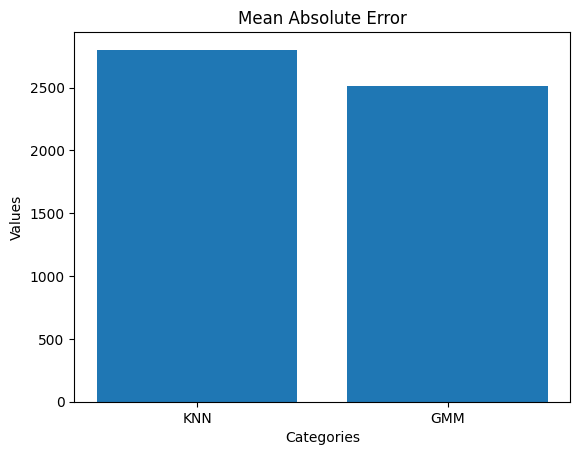

In [51]:
categories = ['KNN', 'GMM']
values = [KNNmae, GMMmae]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Mean Absolute Error')

plt.show()

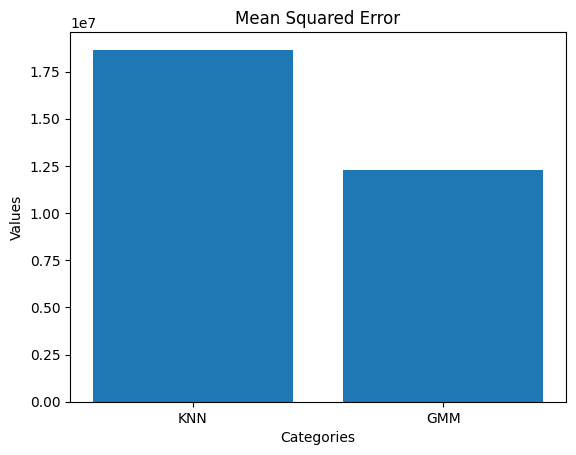

In [52]:
categories = ['KNN', 'GMM']
values = [KNNmse, GMMmse]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Mean Squared Error')

plt.show()

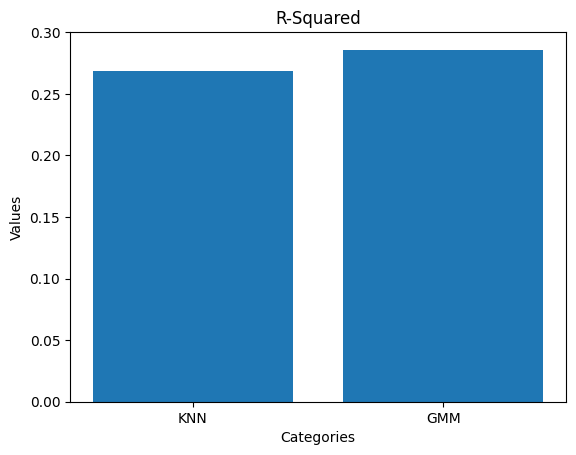

In [53]:
categories = ['KNN', 'GMM']
values = [KNNr2, GMMr2]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('R-Squared')

plt.show()

In [57]:
data = [
    ["Category", "KNN", "GMM"],
    ["Mean Absolute Error", 2800.576927073185, 2382.586097586939],
    ["Mean Squared Error", 18655650.20528432, 10706274.05793304],
    ["R-Squared", 0.2684389834391159, 0.3785225626252957]
]

print(tabulate(data, headers="firstrow"))

Category                        KNN             GMM
-------------------  --------------  --------------
Mean Absolute Error  2800.58         2382.59
Mean Squared Error      1.86557e+07     1.07063e+07
R-Squared               0.268439        0.378523
